In [1]:
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "./data/News/"

train_emb = np.load(path + "train_embeddings.npy")
train_label = np.load(path + "train_labels.npy")
test_emb = np.load(path + "test_embeddings.npy")
test_label = np.load(path + "test_labels.npy")

In [4]:
norm_train_emb = (train_emb - np.expand_dims(np.mean(train_emb, axis =1), axis=1)) / np.expand_dims(np.std(train_emb, axis=1), axis=1)
pca = PCA(n_components=2)
train_emb_PCA = pca.fit_transform(norm_train_emb)

In [3]:
x, y = zip(*train_emb_PCA)
plt.figure()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of 20Newsgroups Embeddings")
plt.scatter(x, y, c=train_label)

NameError: name 'train_emb_PCA' is not defined

In [5]:
pca3 = PCA(n_components=3)
train_emb_PCA3 = pca3.fit_transform(norm_train_emb)

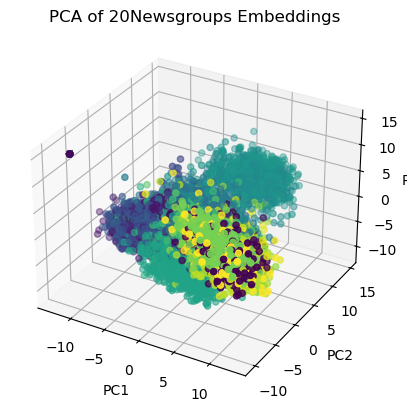

In [6]:
x, y, z= zip(*train_emb_PCA3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA of 20Newsgroups Embeddings")
ax.scatter(x, y, z, c=train_label)
plt.show()

In [7]:
k = 5
isomap = Isomap(n_neighbors=k, n_components=2)
train_emb_iso = isomap.fit_transform(norm_train_emb)

c:\Users\alanm\anaconda3\envs\torchenv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\alanm\anaconda3\envs\torchenv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


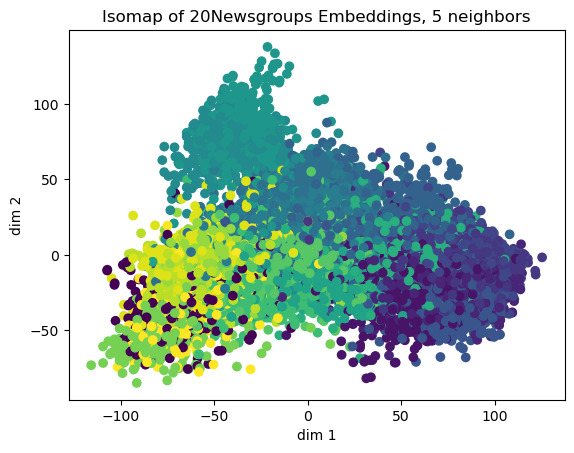

In [9]:
x, y = zip(*train_emb_iso)
plt.figure()
plt.xlabel("dim 1")
plt.ylabel("dim 2")
plt.title(f"Isomap of 20Newsgroups Embeddings, {k} neighbors")
plt.scatter(x, y, c=train_label)

In [5]:
k = 10
isomap3 = Isomap(n_neighbors=k, n_components=3)
train_emb_iso3 = isomap3.fit_transform(norm_train_emb)

c:\Users\alanm\anaconda3\envs\torchenv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\alanm\anaconda3\envs\torchenv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


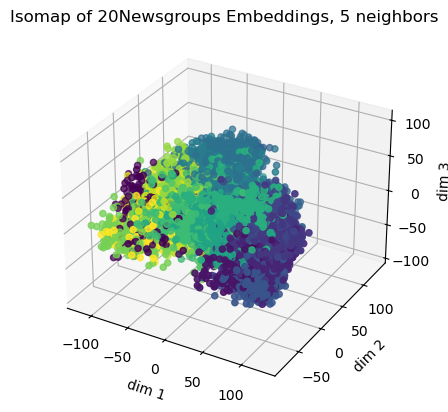

In [7]:
x, y, z= zip(*train_emb_iso3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("dim 1")
ax.set_ylabel("dim 2")
ax.set_zlabel("dim 3")
ax.set_title(f"Isomap of 20Newsgroups Embeddings, {k} neighbors")
ax.scatter(x, y, z, c=train_label)
plt.show()

In [24]:
#data likely doesn't lie in 2 or 3 dims, want to do some dimension estimation

from tqdm import tqdm

'''
calculates MLE dimension estimation
data: dataset
k_1: starting value for knn
k_2: ending value for knn 

returns: mle estimate of dimension
'''

def mle(data, k_1=10, k_2=20): 
    m = 0
    for i in tqdm(range(k_1, k_2+1)): 
        m+=mle_k(i, data)
    return (1/(k_2 - k_1 + 1))*m

def mle_k_x(k, data, x): 
    neighbors = knn(k, data, x)
    T_k = euclidian_metric(x, data[neighbors[k-1]])
    m_k_x = 0
    eps = 1e-15
    for j in range(k-1): 
        dist = euclidian_metric(x, data[neighbors[j]])
        m_k_x += np.log(T_k / dist)
    return ((1/(k-1)) * m_k_x)**-1

def mle_k(k, data): 
    m_k = 0
    for i in range(len(data)):
        m_k +=mle_k_x(k, data, data[i])
    return (1/len(data)) * m_k

def euclidian_metric(x_i, x_j): 
    return np.linalg.norm(x_i - x_j)

def knn(k, data, test):
    return np.argsort(np.sum(data**2, axis=1) - 2 * test.dot(data.T), axis=0)[1:k+1]


In [30]:
mle(train_emb[::50])
#26 dim suggests some type of manifold learning should work, since X 26 dim embedded in 768 dimensions

  0%|          | 0/11 [00:00<?, ?it/s]C:\Users\alanm\AppData\Local\Temp\ipykernel_11660\14321919.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  m_k_x += np.log(T_k / dist)
100%|██████████| 11/11 [00:02<00:00,  5.03it/s]


25.866876958653847